<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/61_las_classification_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [ ]:
%%capture
!pip install rasterio whitebox

In [ ]:
import matplotlib.pyplot as plt
import pooch
import rasterio as rio
import rasterio.plot as ras_plot
import whitebox
from matplotlib.colors import ListedColormap

In [ ]:
u22_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/raster/U22.tif',
    known_hash='e31ab10ca0a6f917c3bba2eea5d0e1a8c3ed0fde4e8b9174183019bb9f830c74'
)

las_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/lidar/nb_2015_2487000_7438000_u22_extent.las.zip',
    known_hash='2277b4ca6e6166340cd2631fdb58971b94689da6bcd595d4d02bf48aff3e057f',
    processor=pooch.Unzip(),
    path='.'
)[0]

In [ ]:
%%capture

wbt = whitebox.WhiteboxTools()

wbt.lidar_idw_interpolation(
    i=las_file,
    output='/content/classification.tif',
    parameter='class',
    resolution=0.5
)

In [ ]:
with rio.open(u22_file) as img_src, rio.open('classification.tif') as cls_src:
    img_rgb = ras_plot.reshape_as_image(img_src.read())
    classification_map = cls_src.read(1, out_dtype='uint8')

In [ ]:
class_colors = {
    0: '#808080',  # Never classified (gray)
    2: '#963700',  # Ground (brown)
    3: '#e6e600',  # Low Vegetation (yellow)
    4: '#00ff00',  # Medium Vegetation (green)
    5: '#008000',  # High Vegetation (dark green)
    6: '#ff0000',  # Building (red)
    8: '#0000ff',  # Model Key-Point (blue)
}

lidar_cmap = ListedColormap(class_colors.values())

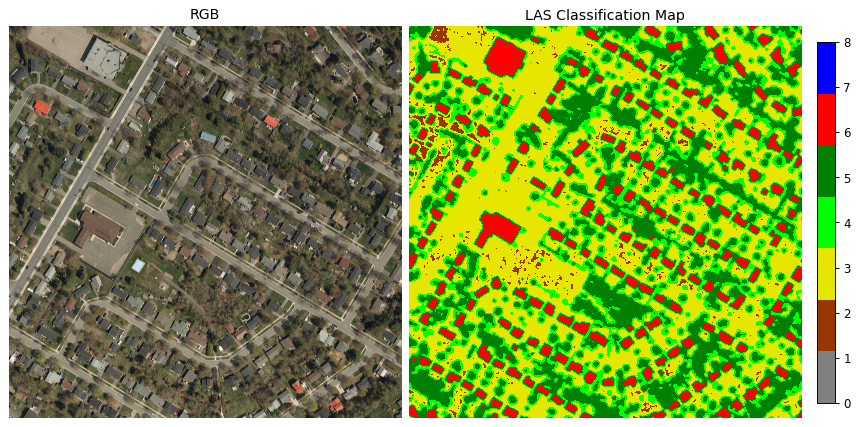

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10), constrained_layout=True)
ax[0].imshow(img_rgb)
cls_img = ax[1].imshow(classification_map, cmap=lidar_cmap)
ax[0].set_title('RGB')
ax[1].set_title('LAS Classification Map')
ax[0].axis('off')
ax[1].axis('off')
cbar = plt.colorbar(cls_img, ax=ax[1], fraction=0.046, pad=0.04)
plt.gcf().set_dpi(85);